# Neural Networks- HW5

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot  figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs

# Utility functions
### clf is the classifier that is trained somewhere else and is sent to this function. If we train the neural net with cancer data with 30 attributes, it will not work. Because inside of this function the scores will be calculated with two-dimensional data. This function assumes that the data is two-dimensional. We can train the clf by only two features, or we can rewrite this function to calculate the scores on high dimension data, and use only two features to draw the scatter plots.

In [2]:
# We use the following function to make subplots and compare different neural networks and compare them.
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFAAAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EFEE00', '#FC0000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

# Activation functions
¶

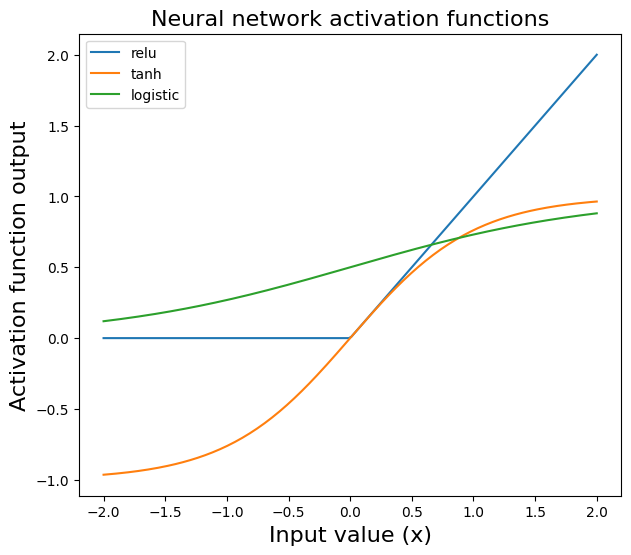

In [3]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

# three commonly used activation functions, relu, tanh, and logistic
import numpy as np
def logistic(x):
    return 1.0/(1 + np.exp(-x))


plt.plot(xrange, np.maximum(xrange,0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label='tanh')
plt.plot(xrange, logistic(xrange), label='logistic')

plt.legend()
plt.title('Neural network activation functions', fontsize='16')
plt.xlabel('Input value (x)', fontsize='16')
plt.ylabel('Activation function output', fontsize='16')

plt.show()

# Synthetic dataset 1: single hidden layer

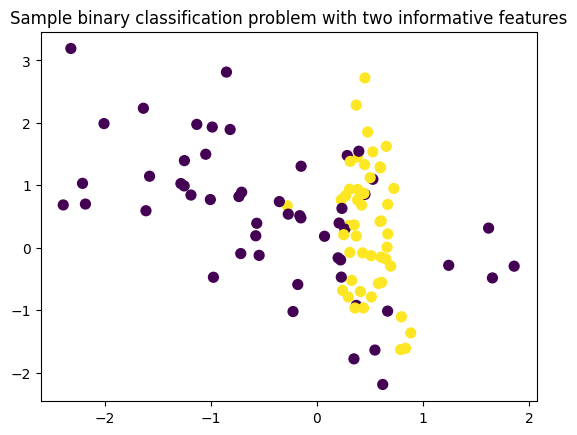

In [4]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o', c=y_C2, s=50)
plt.show()


# MLP classifier

C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lb

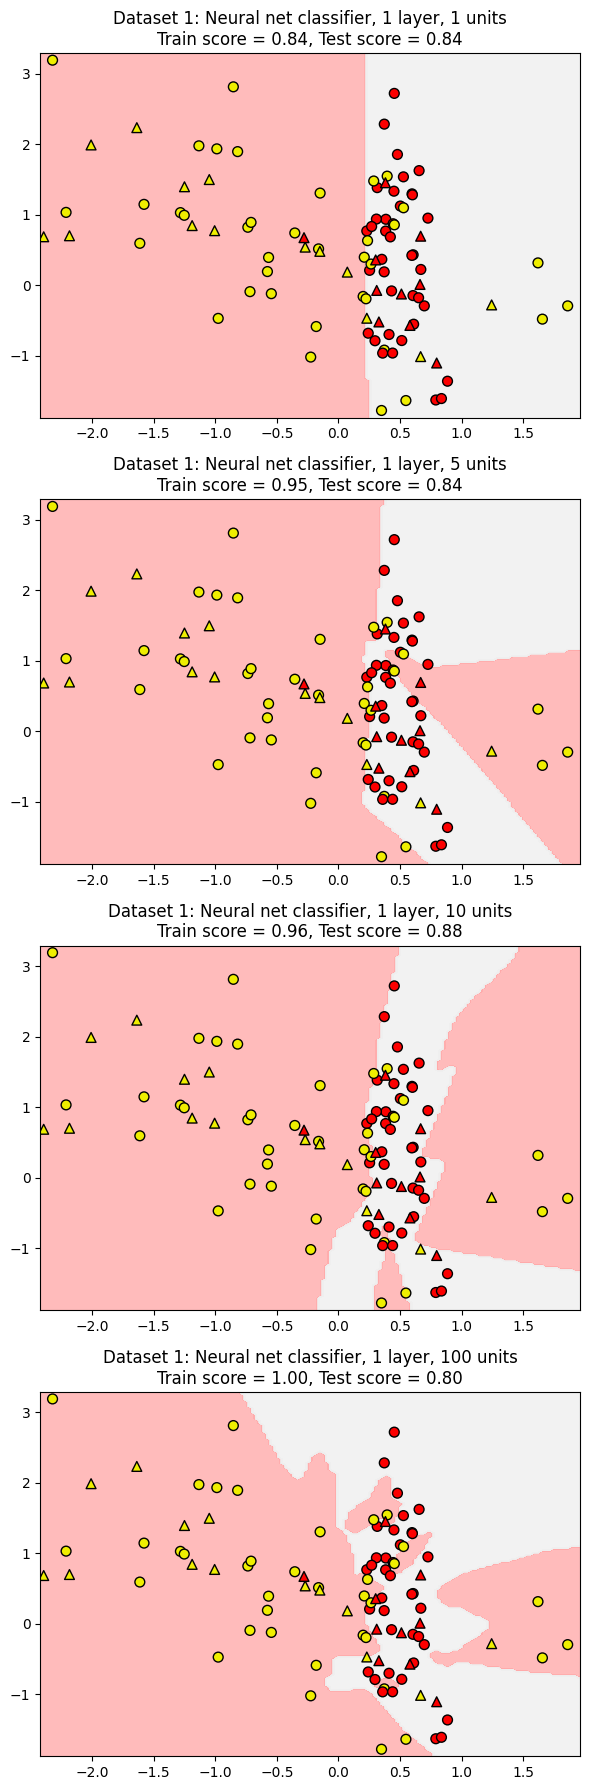

In [5]:
# MLPclassifier
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(4, 1, figsize=(6,18))
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state =0)
for units, axis in zip([1, 5, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
# split the data
# model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


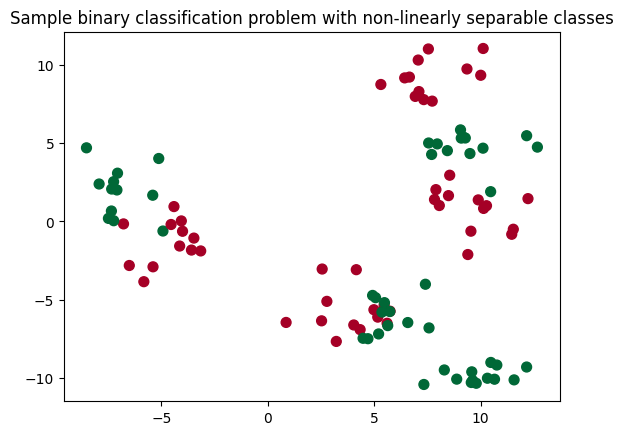

In [6]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()


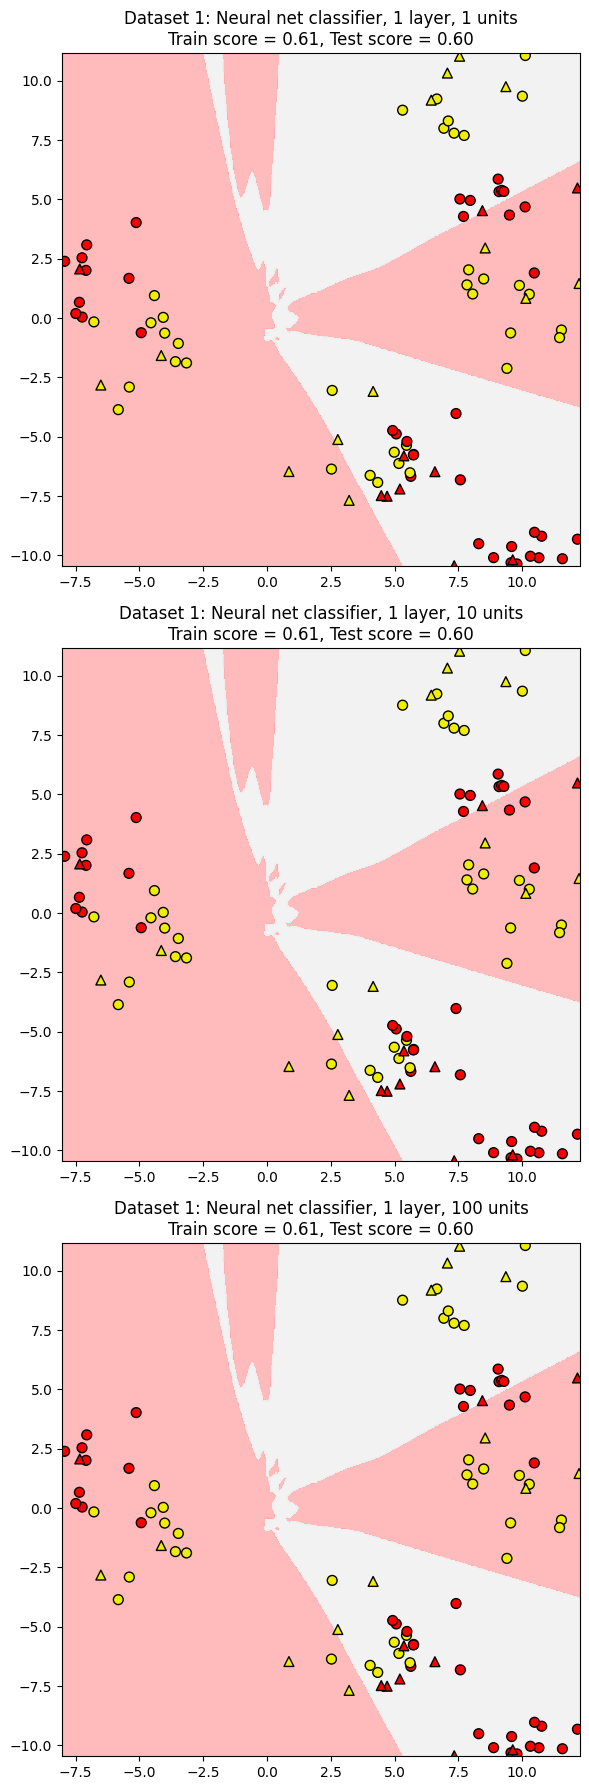

In [7]:
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
for units, axis in zip([1, 10, 100], subaxes):
    # model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# Synthetic dataset 2: two hidden layers

C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


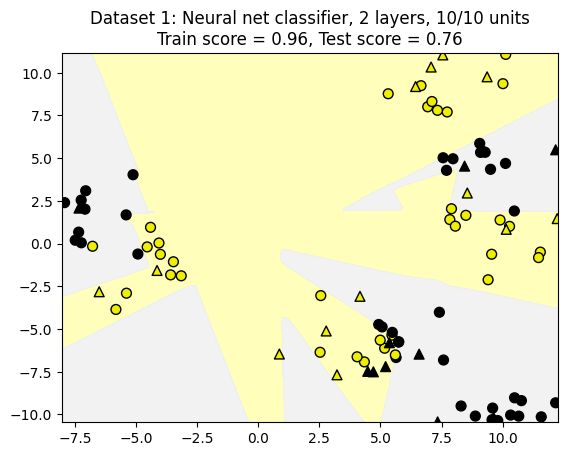

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# model training with two hidden layers

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)


plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

# Regularization parameter: alpha

C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


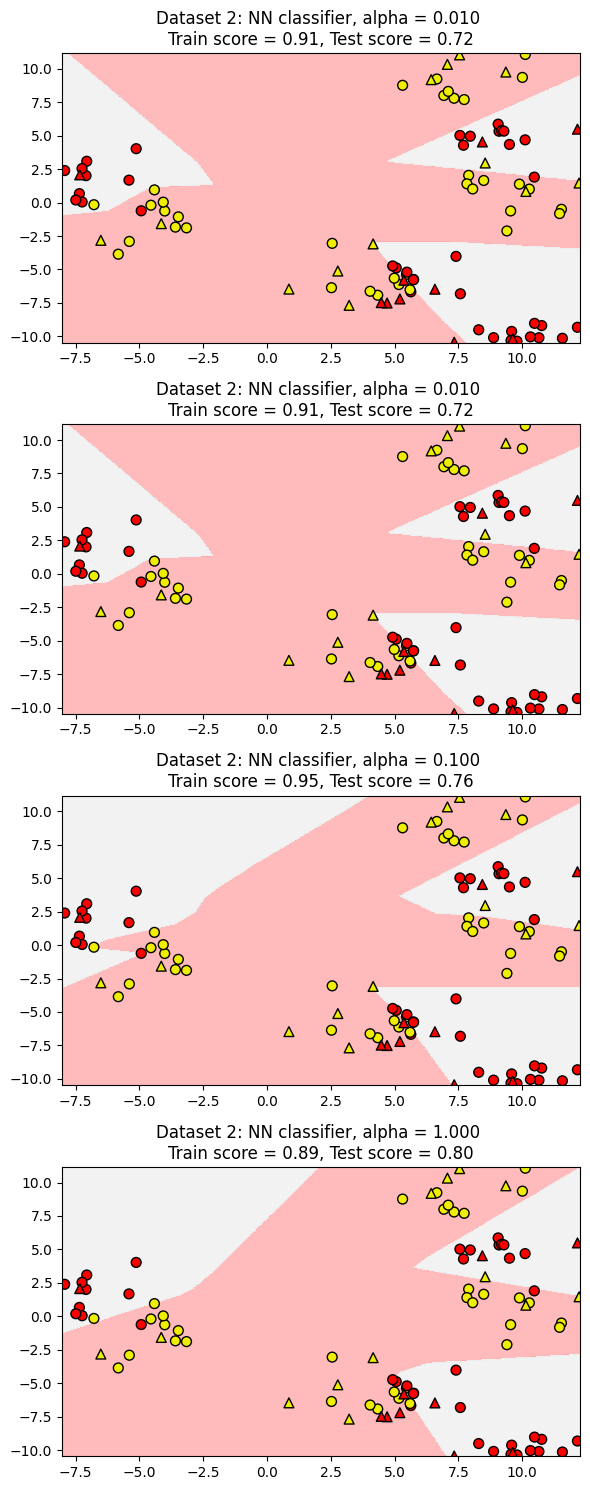

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(4, 1, figsize=(6, 15))
for this_alpha, axis in zip([0.01, 0.01, 0.1, 1, 10], subaxes):
    # training the data
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = this_alpha,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# The effect of different choices of activation function

C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lb

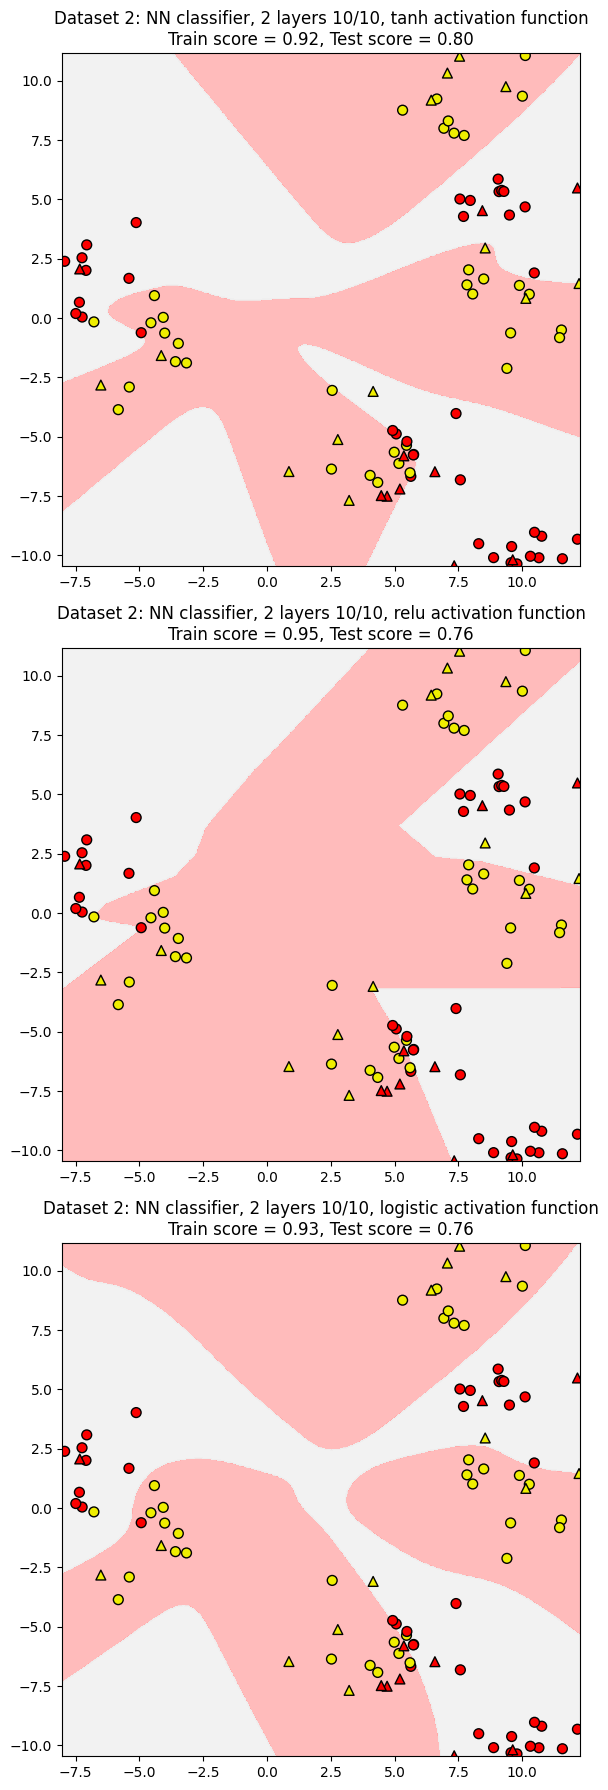

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
for this_activation, axis in zip(['tanh', 'relu', 'logistic'], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = 0.1, activation = this_activation,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


# HW5        
## Part 1
#### In this assignment, you will implement an MLP neural network to classify breast cancer data.

#### We will apply a neural network with 2 hidden layers with a varying number of units (10, 20, 50, 100).  Then we will find out the optimal alpha parameter value for regularization.  We will also apply different activation functions (logistic, tanh, relu) and we will show their effects. We should also compare the results without scaling and with scaling.
## Part 2
#### Reflect on your key learnings and difficulties encountered while completing this assignment, encapsulating your thoughts in approximately 100 words within a text cell.     

### Submission:

#### Submission:

###A Jupyter file (Your_Name_HW5.ipynb) and a pdf version of the Jupyter file will be submitted.

# Solution ==============================

Name : Priyadarshini Shanmugasundaram Murugan

LOADING DATA

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [13]:
# Split the dataset into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


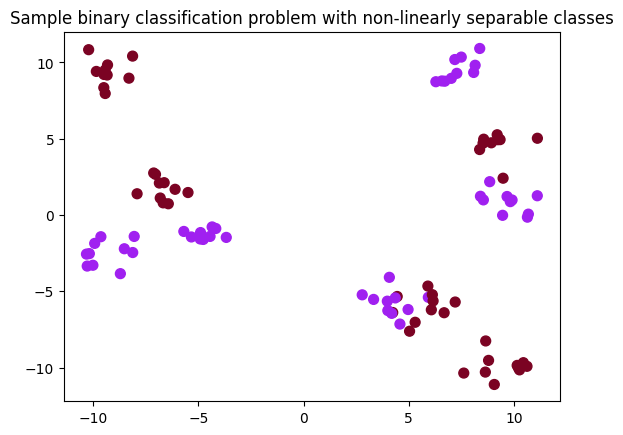

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Create difficult synthetic dataset
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=10, cluster_std=0.8, random_state=4)
y_D2 = y_D2 % 2  # Convert labels to binary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=42)

# Define a custom colormap
cmap_bold = ListedColormap(['#A020F0', '#7B0323'])
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker='o', s=50, cmap=cmap_bold)
plt.show()


# Varying the number of units

Number of units: 10, Train Accuracy: 0.9375, Test Accuracy: 0.9000


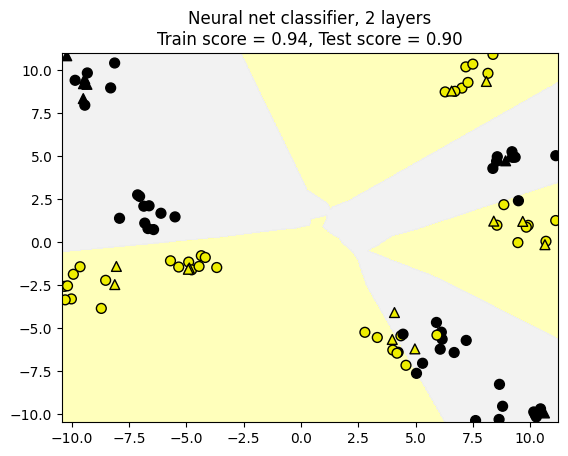

Number of units: 20, Train Accuracy: 0.9500, Test Accuracy: 0.9500


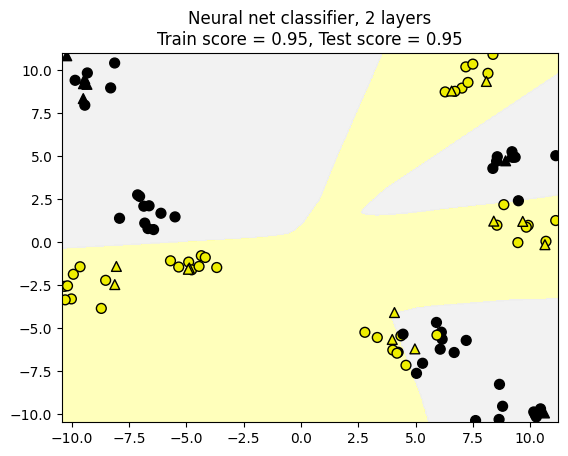

Number of units: 50, Train Accuracy: 0.9625, Test Accuracy: 0.9500


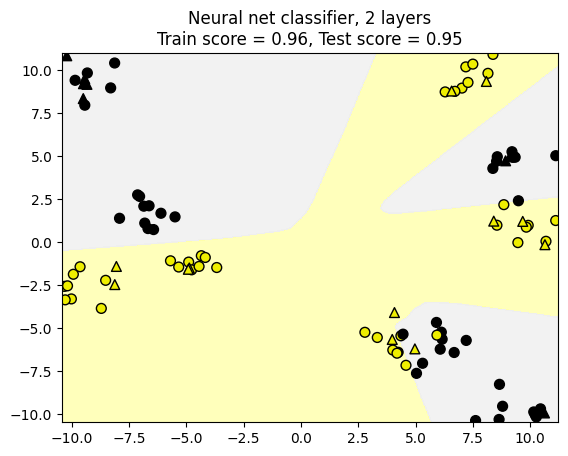

Number of units: 100, Train Accuracy: 0.9625, Test Accuracy: 0.9500


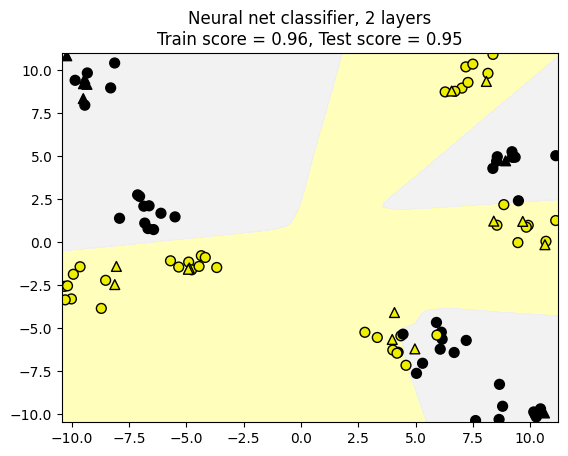

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=42)

# Define a function to create and train the MLPClassifier with varying numbers of units
def train_mlp(units):
    mlp = MLPClassifier(hidden_layer_sizes=(units, units), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    return mlp

# Define the numbers of units
units_list = [10, 20, 50, 100]

# Train the MLP classifiers and evaluate them
for units in units_list:
    mlp = train_mlp(units)
    train_accuracy = accuracy_score(y_train, mlp.predict(X_train))
    test_accuracy = accuracy_score(y_test, mlp.predict(X_test))
    print(f"Number of units: {units}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # If you have a function to visualize decision boundaries, you can use it here
    # plot_class_regions_for_classifier(mlp, X_train, y_train, X_test, y_test, 'Neural net classifier, 2 layers')
    plot_class_regions_for_classifier(mlp, X_train, y_train, X_test, y_test,'Neural net classifier, 2 layers')



# The Regularization parameter - Alpha

C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


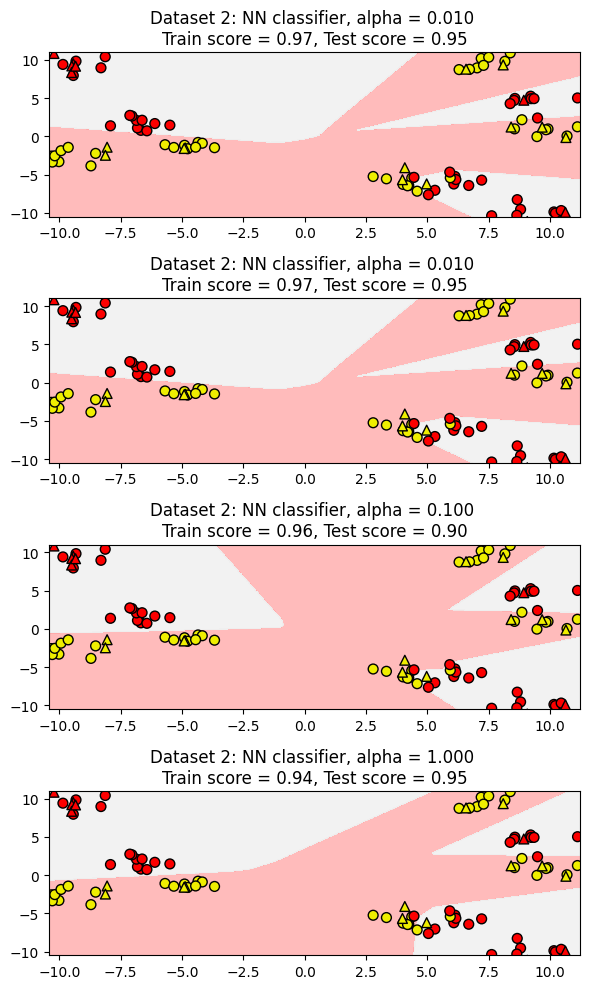

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(4, 1, figsize=(6, 10))
for this_alpha, axis in zip([0.01, 0.01, 0.1, 1, 10], subaxes):
    # training the data
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = this_alpha,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


# Selecting the optimal Alpha value

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define a range of alpha values to try
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Define parameters for grid search
param_grid = {'alpha': alphas}

# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best alpha value found
print("Best alpha:", grid_search.best_params_['alpha'])

# Evaluate the model with the best alpha value on the test set
best_mlp = grid_search.best_estimator_
#y_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test,  best_mlp.predict(X_test))
print("Test Accuracy with best alpha:", test_accuracy)


C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best alpha: 1
Test Accuracy with best alpha: 0.95


# The Effect of 3 activation functions

C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


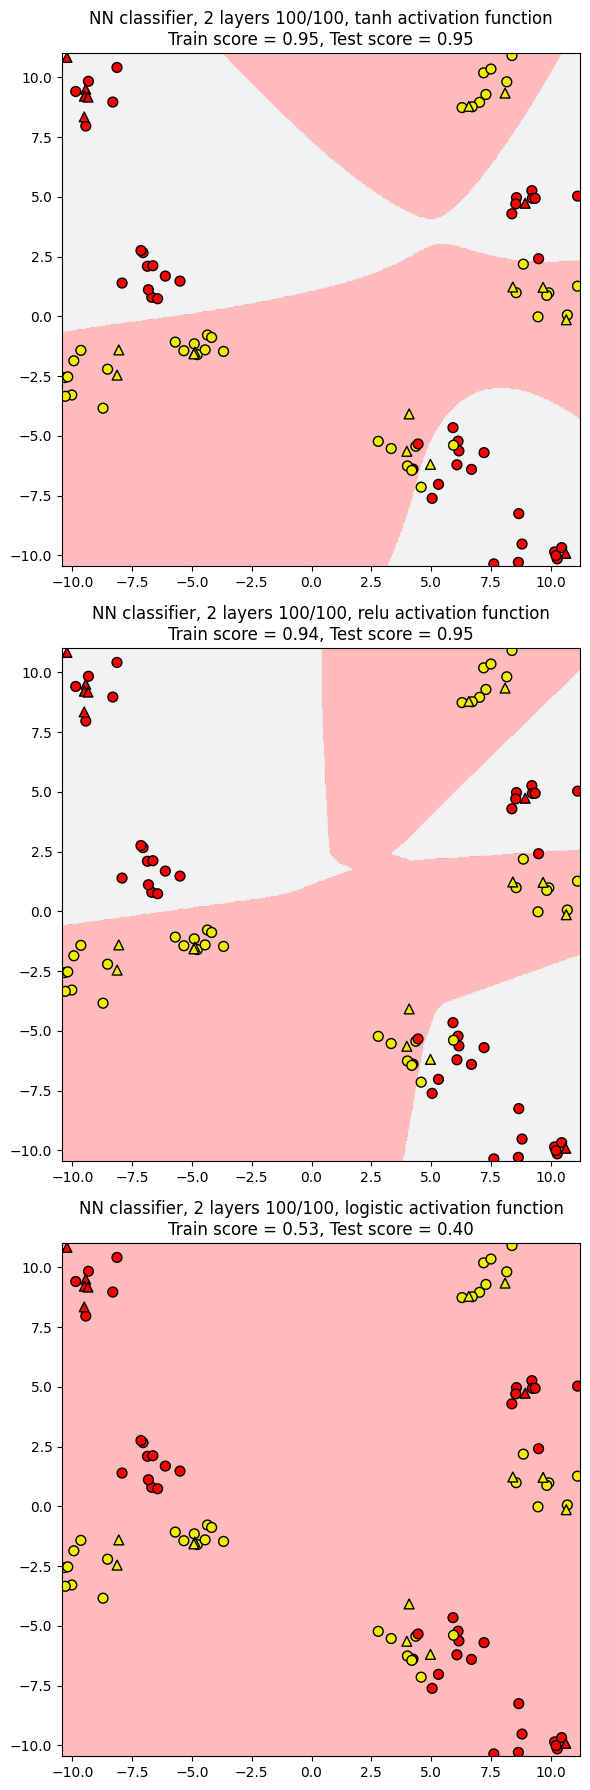

In [18]:
# Create subplots
fig, subaxes = plt.subplots(3, 1, figsize=(6, 18))

# Loop through different activation functions and corresponding subplots
for this_activation, axis in zip(['tanh', 'relu', 'logistic'], subaxes):
    # Train MLP classifier with specified activation function
    mlp = MLPClassifier(hidden_layer_sizes = [100,100],alpha = 1.0, activation = this_activation,
                solver='lbfgs', random_state=0).fit(X_train,y_train)

    
    # Plot decision boundaries and data points
    title = f'NN classifier, 2 layers 100/100, {this_activation} activation function'.format(this_activation)

    plot_class_regions_for_classifier_subplot(mlp, X_train, y_train, X_test, y_test, title, axis)

plt.tight_layout()
plt.show()


# Result Without and with scaling

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Define MLP classifiers with different activation functions
classifiers = {
    'logistic': MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42),
    'tanh': MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42),
    'relu': MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

# Evaluate classifiers without scaling
print("Results without scaling:")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"{name}: Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

# Evaluate classifiers with scaling
print("\nResults with scaling:")
for name, clf in classifiers.items():
    clf_pipe = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(clf_pipe, X, y, cv=5)
    print(f"{name}: Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")


Results without scaling:
logistic: Mean Accuracy: 0.9191, Std Dev: 0.0154
tanh: Mean Accuracy: 0.9261, Std Dev: 0.0235
relu: Mean Accuracy: 0.9121, Std Dev: 0.0295

Results with scaling:
logistic: Mean Accuracy: 0.9649, Std Dev: 0.0124
tanh: Mean Accuracy: 0.9772, Std Dev: 0.0181
relu: Mean Accuracy: 0.9772, Std Dev: 0.0105


# Reflection :

Throughout this assignment, I have gained a more profound understanding of MLP neural networks, including their architecture, hyperparameters, and training process. I experimented with different configurations, such as hidden layer sizes, activation functions, and regularization parameters, which helped me comprehend their influence on model performance. However, I faced a challenge feature scaling, especially when comparing results. Overall, this assignment has improved my knowledge of neural networks and emphasized the importance of hyperparameter tuning to optimize model performance. It has also highlighted the significance of data preprocessing to achieve reliable results in machine learning tasks.

# Conclusion:

This assignment provides a comprehensive exploration of MLP neural networks applied to the breast cancer dataset. Investigate various aspects of MLP classifiers, including hidden layer sizes, activation functions, regularization parameters, and feature scaling. By experimenting with different configurations and evaluating their performance, we gain valuable insights into the behavior of MLP models and the importance of hyperparameter tuning. Through this process, deepen our understanding of neural networks and their application in classification tasks. These insights will inform future endeavors in machine learning, guiding us toward more effective model design and optimization strategies. In conclusion, this exploration of MLP neural networks provides a solid foundation for future work in machine learning.